<a href="https://colab.research.google.com/github/enriqueasegura/Exercises/blob/master/Classical_Mechanics_First_Coding_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import astropy
from google.colab import files

import matplotlib

!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

matplotlib.font_manager._rebuild()
matplotlib.rc('font', family='TH Sarabun New')

--2019-09-01 01:27:20--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2019-09-01 01:27:21--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00

In [2]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving drag data.csv to drag data.csv
User uploaded file "drag data.csv" with length 282 bytes


In [3]:
drag_data_table = pd.read_csv("drag data.csv")

v_mach1_values = drag_data_table['v/mach1']

drag_coeff_values = drag_data_table['drag coefficient']

velocity_vector = np.multiply(343, v_mach1_values)

velocity_vector.values

array([  0.     ,  37.88778,  46.90868,  97.42572, 108.2508 , 128.09678,
       169.59292, 209.28488, 234.5434 , 241.76012, 250.78102, 261.6061 ,
       274.23536, 279.6479 , 294.08134, 306.7106 , 313.92732, 328.36076])

In [4]:
#let's do some polyfit to get a estimate 

import numpy.polynomial.polynomial as poly

x_new = np.linspace(velocity_vector.values[0], velocity_vector.values[-1], num=len(velocity_vector.values)*10)

coefs = np.polyfit(velocity_vector.values, drag_coeff_values, 4)
ffit = np.polyval(coefs, x_new)

#ffit = np.polyval(coefs[::-1], x_new)

print('This is the 4th degree polynomial for a function to map velocity (x) to drag coefficient:')
print(np.poly1d(coefs))

This is the 4th degree polynomial for a function to map velocity (x) to drag coefficient:
           4             3             2
9.826e-11 x - 4.063e-08 x + 6.465e-06 x - 0.0007889 x + 0.2666


In [0]:
# This function is simply taking the code from above and using the fit
# to obtain the drag coefficient for a given velocity.

def Drag_at_V(velocity):
  #eq = 9.826e-11 *(-velocity**4) -  4.063e-08  *(-velocity**3) + 6.465e-06 * (-velocity**2) - 0.0007889 *(-velocity) +  0.2666
  #return eq
  return np.poly1d(coefs)(velocity)

#Define Weight Function

def Weight_Bullet():
  return mass * g 

#reading of the image of the plot (because there was no better way ???)

def Air_Density(h):
  #from using a linear inspection from the picture on the plot
  #we find that -.37 km/m^4 is the slope of the plot
  return ((-.37/3000) * h + 1.2)

#now let's define drag force fully

def Drag_Force(v, h, drag_toggle):
  
  #First call elements that are immune to drag 
  curr_rho_h = Air_Density(h)
  curr_drag_force = curr_rho_h * np.square(v) * cross_area * .5 
  
  #if drag_toggle is off, then just do standard "pretend physics" as Prof. Aniol says
  if drag_toggle == 'off':
    curr_drag_force *= 0
  
  #Otherwise, apply drag conditions to simulation
  elif drag_toggle == 'on':
    curr_drag_force *= Drag_at_V(v)
  
  #return final result
  return curr_drag_force

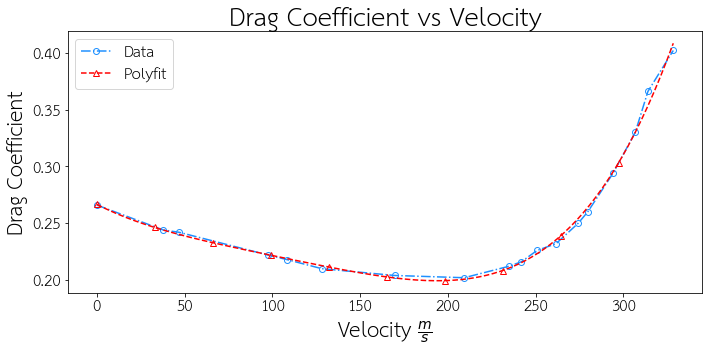

In [31]:
#Do the plot!

plt.figure(figsize=(10,5))

plt.plot(velocity_vector, drag_coeff_values, linestyle='-.', color='dodgerblue',marker='o',markerfacecolor='none', label='Data')
plt.plot(x_new, ffit, color='red',marker='^',markevery=18,markerfacecolor='none', linestyle='--',label='Polyfit')

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel(r'Velocity $\frac{m}{s}$', fontsize=20)
plt.ylabel('Drag Coefficient', fontsize=20)

plt.title('Drag Coefficient vs Velocity',fontsize=25)

plt.tight_layout()

In [0]:
#All calculations are on metre, kilogram, and second based units

#Before setting up the system:

All calculations are on metre, kilogram, and second based units. 

mass = 13/1000 kg

cross_area = $1.06 \times 10^{-4}$ m$^2$

muzzle_velocity = $275$ m/s

So, using conservation of energy: 

$\displaystyle \frac{m {v_i}^2}{2} = mgh$

$\displaystyle h = \frac{{v_i}^2}{2g}$

Thus yielding $h$ = $\frac{275^2}{2*10} \approx 3858.42$ meters.

Also, for reference, the time of flight to the maximum height is found by: 

$\displaystyle v_f = v_i - gt $
$\displaystyle \frac{v_i}{g} = t$

Thus, $t \approx 28.1 s$


In [0]:
# Initial Conditions Variables
mass = 13/1000 
cross_area =  1.06e-4
muzzle_velocity =  275 
g = 9.8

initial_height = 0

In [33]:
muzzle_velocity**2/2000

37.8125

In [0]:
#Let's put this together in one shot 

#Let's calculate intial condition \ seed values:

def Flight_Simulator(dt,initial_height, initial_velocity, drag_toggle):
    mass = 13/1000 
    cross_area =  1.06e-4
    #initial_velocity =  275 
    g = 9.8
    #initial_height = 1840
    count = 0
  
    acc_arr =  []
    vec_arr =  []
    pos_arr =  []
    drag_arr = []
  
    status = 'not done'
  
  #calculate the initial seed values 
  
  #first: calculate acceleration:
    initial_acc =  (-Drag_Force(initial_velocity, initial_height, drag_toggle) - Weight_Bullet()) / mass
  
  #then calculate velocity:
    initial_vec = initial_velocity + initial_acc*dt
  
  #then calculate position:
    initial_pos = initial_height + initial_vec*dt
    
    #keep drag
    initial_drag = -Drag_Force(initial_velocity, initial_height, drag_toggle) 
    drag_arr.append(initial_drag)
      

  #save those values:
    acc_arr.append(initial_acc)
    vec_arr.append(initial_vec)
    pos_arr.append(initial_pos)
  
    while status == 'not done':
        #print('current pos, vec, acc, drag:', pos_arr[count], vec_arr[count], acc_arr[count])
        
        curr_acc =  (-Drag_Force(vec_arr[count], pos_arr[count], drag_toggle) - Weight_Bullet()) / mass
        acc_arr.append(curr_acc)
    
    #calculate initial vec
        v_next = vec_arr[count] + dt*acc_arr[count]
        vec_arr.append(v_next)
    
    #calculate initial pos
        pos_next = pos_arr[count] + dt*vec_arr[count]
        pos_arr.append(pos_next)
        
        drag_next = -Drag_Force(vec_arr[count], pos_arr[count], drag_toggle) 
        drag_arr.append(drag_next)
        
        if vec_arr[count] < 0 and count >1:
            #return(pos_arr,vec_arr,acc_arr,drag_arr)
            print('current pos, vec, acc, drag:', pos_arr[count], vec_arr[count], acc_arr[count])
            status = 'done'
            return(pos_arr, vec_arr,acc_arr, drag_arr)
        
        count = count +1          

In [0]:
def Flight_Tracker(dt,initial_height, initial_velocity, drag_toggle):
    
    mass = 13/1000 
    cross_area =  1.06e-4
    #initial_velocity =  275 
    g = 9.8
    #initial_height = 1840
    count = 0
    
    #This halt conditions drive the overall program
    
    first_stage = 'not done'
    second_stage = 'not done'
    
    acc_arr =  []
    vec_arr =  []
    pos_arr =  []
    drag_arr = []
    
    time_to_top = 0
    time_of_flight = 0
    time_to_ground = 0
    
    max_height = 0
    
    idx_top = 0
    
    #calculate the initial seed values 
  
    #first: calculate acceleration:
    initial_acc =  (-Drag_Force(initial_velocity, initial_height, drag_toggle) - Weight_Bullet()) / mass
  
    #then calculate velocity:
    initial_vec = initial_velocity + initial_acc*dt
  
    #then calculate position:
    initial_pos = initial_height + initial_vec*dt
    
    #keep drag
    initial_drag = -Drag_Force(initial_velocity, initial_height, drag_toggle) 
    drag_arr.append(initial_drag)
      

    #save those values:
    acc_arr.append(initial_acc)
    vec_arr.append(initial_vec)
    pos_arr.append(initial_pos)    
    
    if first_stage == 'not done':

      #This halt conditions drive the first stage loop:
      first_stage_status = 'not done'
      
      while first_stage_status == 'not done':
        
        if vec_arr[count] < 0:
          time_to_top = len(pos_arr)*dt
          max_height = pos_arr[-1]
          #return(pos_arr,vec_arr,acc_arr,drag_arr)
          print('Current Pos, Vec, Acc, Drag at top height:', pos_arr[count], vec_arr[count], acc_arr[count])
          print('Max Height Reached at :' + str(max_height) + ' meters')
          first_stage_status = 'done'
          first_stage = 'done'
          #print('current pos, vec, acc, drag:', pos_arr[count], vec_arr[count], acc_arr[count])
        
        else:
          curr_acc =  (-Drag_Force(vec_arr[count], pos_arr[count], drag_toggle) - Weight_Bullet()) / mass
          acc_arr.append(curr_acc)
    
          #calculate initial vec
          v_next = vec_arr[count] + dt*acc_arr[count]
          vec_arr.append(v_next)
    
          #calculate initial pos
          pos_next = pos_arr[count] + dt*vec_arr[count]
          pos_arr.append(pos_next)
        
          drag_next = -Drag_Force(vec_arr[count], pos_arr[count], drag_toggle) 
          drag_arr.append(drag_next)
        
          count = count+1
    
    #if you are the top, set boundary conditions to start the descend 
    
    if first_stage == 'done':
    #seed values for the descend
      idx_top = count 
      #first: calculate acceleration:
      initial_acc =  (Drag_Force(vec_arr[count], pos_arr[count], drag_toggle) - Weight_Bullet()) / mass
  
      #then calculate velocity:
      initial_vec = vec_arr[count] + acc_arr[count]*dt
  
      #then calculate position:
      initial_pos = pos_arr[count] + vec_arr[count]*dt
    
      #keep drag
      initial_drag = Drag_Force(initial_vec, initial_pos, drag_toggle) 
      drag_arr.append(initial_drag)
      

      #save those values:
      acc_arr.append(initial_acc)
      vec_arr.append(initial_vec)
      
      #This halt condition drives the first stage loop:
      
      second_stage_status = 'not done'
      
      while second_stage_status == 'not done':
        
        if pos_arr[count] < 0:
            #return(pos_arr,vec_arr,acc_arr,drag_arr)
            print('Current Pos, Vec, Acc, Drag at ground level:', pos_arr[count], vec_arr[count], acc_arr[count])
            time_of_flight = len(pos_arr)*dt
            time_to_ground = len(pos_arr[idx_top:])*dt 
            second_stage_status = 'done'
            second_stage = 'done'
        
        #print('current pos, vec, acc, drag:', pos_arr[count], vec_arr[count], acc_arr[count])
        
        else:
          curr_acc =  (Drag_Force(vec_arr[count], pos_arr[count], drag_toggle) - Weight_Bullet()) / mass
          acc_arr.append(curr_acc)
   
          #calculate initial vec
          v_next = vec_arr[count] + dt*acc_arr[count]
          vec_arr.append(v_next)
    
          #calculate initial pos
          pos_next = pos_arr[count] + dt*vec_arr[count]
          pos_arr.append(pos_next)
        
          drag_next = Drag_Force(vec_arr[count], pos_arr[count], drag_toggle) 
          drag_arr.append(drag_next)
        
          count = count +1
        
    if first_stage == 'done' and second_stage == 'done':
      print('Time of Flight for Trajectory: ', time_of_flight)
      print('Time of Flight to Top: ', time_to_top)
      print('Time of Flight for Ground: ', time_to_ground)
      return(pos_arr,vec_arr,acc_arr,drag_arr, time_to_top,time_of_flight,time_to_ground, idx_top, max_height)

In [72]:
initial_velocity =  275 
initial_height = 0
dt = 0.0001

test_up = Flight_Simulator(dt,initial_height, initial_velocity, 'on')

current pos, vec, acc, drag: 1082.6693740941953 -0.00020558036099318946 -9.800000000695121


#Values to Gauge your Answer:

With Drag: Max Height: 1078.

With No Drag: Max Height: 3858 

With Colorado Spring Height and Drag : 3071 - 1840 = 1231

In [81]:
test = Flight_Tracker(dt,initial_height, initial_velocity, 'on')

Current Pos, Vec, Acc, Drag at top height: 1082.6693740941953 -0.00020558036099318946 -9.800000000695121
Max Height Reached at :1082.6693740941953 meters
Current Pos, Vec, Acc, Drag at ground level: -0.004758156076227894 -69.69932612730486 -1.0288288477329093
Time of Flight for Trajectory:  36.3925
Time of Flight to Top:  12.366800000000001
Time of Flight for Ground:  24.0258


In [0]:
time = np.multiply(np.arange(0, len(test[0]), 1), dt)

time_v = np.multiply(np.arange(dt, len(test[1]), 1), dt)

time_a = np.multiply(np.arange(dt, len(test[2]), 1), dt)

time_d = np.multiply(np.arange(dt, len(test[3]), 1), dt)

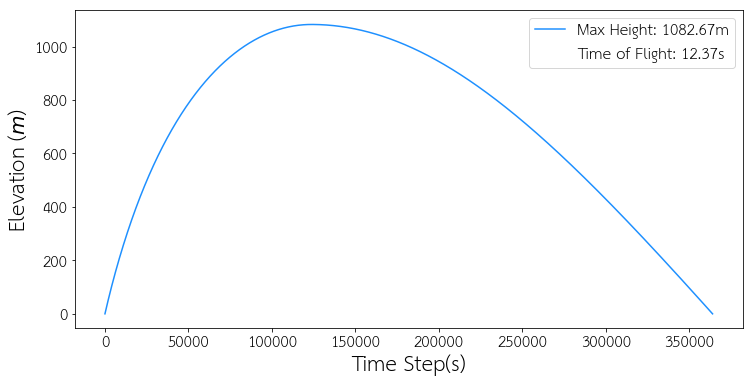

In [84]:
f1 = plt.figure(figsize=(20,10))

plt.subplot(221)
plt.plot(test[0], linestyle='-', color='dodgerblue',markerfacecolor='none', label='Max Height: '+str(np.round(test[-1],2)) + 'm', markevery=10)
plt.plot(test[0], linestyle='', color='dodgerblue',markerfacecolor='none', label='Time of Flight: '+str(np.round(test[4],2)) + 's', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(s)',fontsize=20)
plt.ylabel('Elevation ($m$)',fontsize=20)

plt.tight_layout()

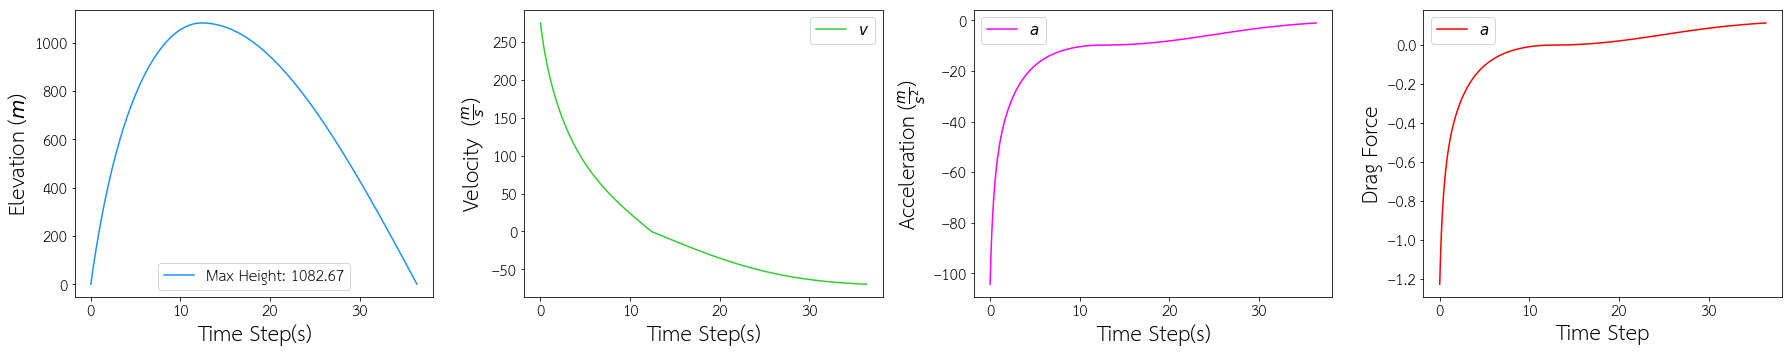

In [87]:
f1 = plt.figure(figsize=(25,5))

plt.subplot(141)
plt.plot(time, test[0], linestyle='-', color='dodgerblue',markerfacecolor='none', label='Max Height: '+str(np.round(test[-1],2)), markevery=10)
#plt.plot(test[0], linestyle='', color='dodgerblue',markerfacecolor='none', label='Time of Flight: '+str(np.round(test[4],2)), markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(s)',fontsize=20)
plt.ylabel('Elevation ($m$)',fontsize=20)

plt.subplot(142)
plt.plot(time_v, test[1], linestyle='-', color='limegreen',markerfacecolor='none', label=r'$v$', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(s)',fontsize=20)
plt.ylabel(r'Velocity  ($\frac{m}{s}$)',fontsize=20)

plt.subplot(143)
plt.plot(time_v, test[2], linestyle='-', color='magenta',markerfacecolor='none', label=r'$a$', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(s)',fontsize=20)
plt.ylabel(r'Acceleration ($\frac{m}{s^2}$)',fontsize=20)

plt.subplot(144)
plt.plot(time_v, test[3], linestyle='-', color='red',markerfacecolor='none', label=r'$a$', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step',fontsize=20)
plt.ylabel('Drag Force',fontsize=20)

plt.tight_layout()

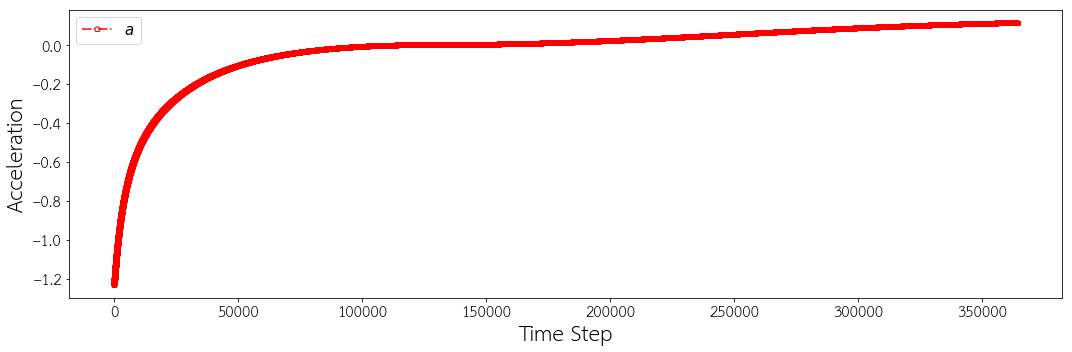

In [88]:
plt.figure(figsize=(15,5))
plt.plot(test[3], linestyle='-.', marker='p', color='red',markerfacecolor='none', label=r'$a$', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Time Step',fontsize=20)
plt.ylabel('Acceleration',fontsize=20)

plt.tight_layout()

In [95]:
#intial conditions for classical setting

initial_velocity =  275 
initial_height = 0
dt = 0.01

test_classical = Flight_Tracker(dt,initial_height, initial_velocity, 'off')
print('========')
test_drag = Flight_Tracker(dt,initial_height, initial_velocity, 'on')

Current Pos, Vec, Acc, Drag at top height: 3859.7924399996023 -0.08600000001865304 -9.8
Max Height Reached at :3859.7924399996023 meters
Current Pos, Vec, Acc, Drag at ground level: -1.1509200011720195 -194.5180000000265 -9.8
Time of Flight for Trajectory:  67.75
Time of Flight to Top:  28.07
Time of Flight for Ground:  39.69
Current Pos, Vec, Acc, Drag at top height: 1078.4478890707212 -0.0012141325646104761 -9.800010859818903
Max Height Reached at :1078.4478890707212 meters
Current Pos, Vec, Acc, Drag at ground level: -0.3823253073229058 -69.69560432330518 -1.0340598558594716
Time of Flight for Trajectory:  36.29
Time of Flight to Top:  12.33
Time of Flight for Ground:  23.97


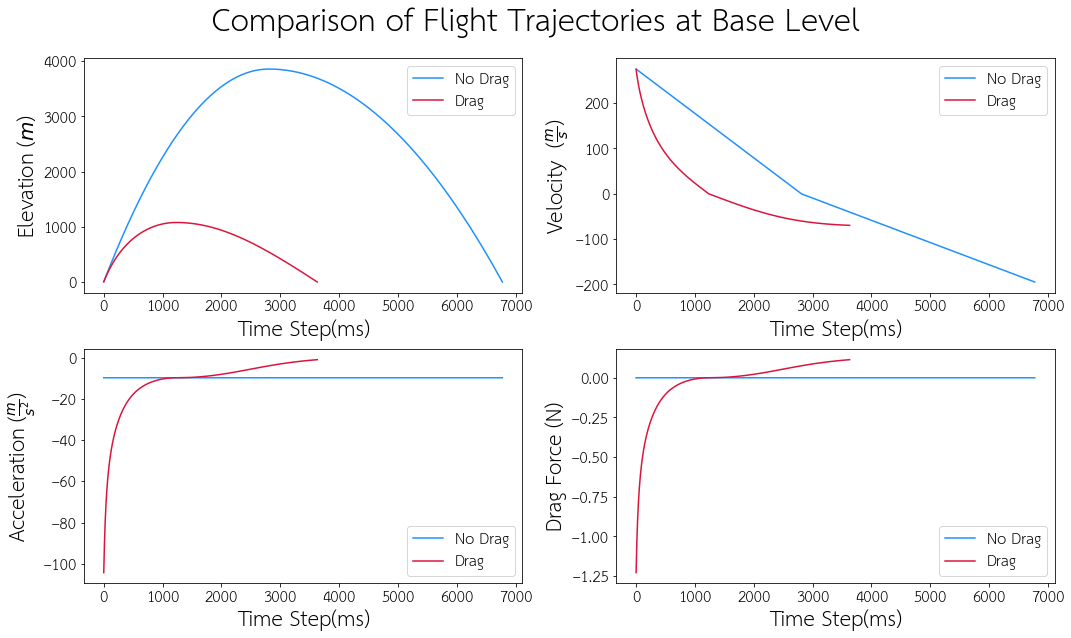

In [139]:
f1 = plt.figure(figsize=(15,9))

plt.subplot(221)
plt.plot(test_classical[0], linestyle='-', color='dodgerblue',markerfacecolor='none', label='No Drag', markevery=10)
plt.plot(test_drag[0], linestyle='-', color='crimson',markerfacecolor='none', label='Drag', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(ms)',fontsize=20)
plt.ylabel('Elevation ($m$)',fontsize=20)

plt.subplot(222)
plt.plot(test_classical[1], linestyle='-', color='dodgerblue',markerfacecolor='none', label='No Drag', markevery=10)
plt.plot(test_drag[1], linestyle='-',  color='crimson',markerfacecolor='none', label='Drag', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(ms)',fontsize=20)
plt.ylabel(r'Velocity  ($\frac{m}{s}$)',fontsize=20)

plt.subplot(223)
plt.plot(test_classical[2], linestyle='-', color='dodgerblue',markerfacecolor='none', label=r'No Drag', markevery=10)
plt.plot(test_drag[2], linestyle='-',  color='crimson',markerfacecolor='none', label='Drag', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(ms)',fontsize=20)
plt.ylabel(r'Acceleration ($\frac{m}{s^2}$)',fontsize=20)

plt.subplot(224)
plt.plot(test_classical[3], linestyle='-', color='dodgerblue',markerfacecolor='none', label='No Drag', markevery=10)
plt.plot(test_drag[3], linestyle='-',  color='crimson',markerfacecolor='none', label='Drag', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(ms)',fontsize=20)
plt.ylabel('Drag Force (N)',fontsize=20)


plt.suptitle('Comparison of Flight Trajectories at Base Level', fontsize=30)

plt.tight_layout()
plt.subplots_adjust(top=.9)

In [130]:
#intial conditions for classical setting for colorado 

initial_velocity =  275 
initial_height = 1840
dt = 0.01

test_classical_co = Flight_Tracker(dt,initial_height, initial_velocity, 'off')
print('========')
test_drag_co = Flight_Tracker(dt,initial_height, initial_velocity, 'on')

Current Pos, Vec, Acc, Drag at top height: 5699.7924399996 -0.08600000001865304 -9.8
Max Height Reached at :5699.7924399996 meters
Current Pos, Vec, Acc, Drag at ground level: -1.017060001430869 -236.36400000003212 -9.8
Time of Flight for Trajectory:  76.29
Time of Flight to Top:  28.07
Time of Flight for Ground:  48.230000000000004
Current Pos, Vec, Acc, Drag at top height: 3071.740562186992 -0.06998895864959932 -9.80000070017816
Max Height Reached at :3071.740562186992 meters
Current Pos, Vec, Acc, Drag at ground level: -0.5231580473332096 -74.23850894070439 0.45714245849041674
Time of Flight for Trajectory:  62.93
Time of Flight to Top:  13.450000000000001
Time of Flight for Ground:  49.49


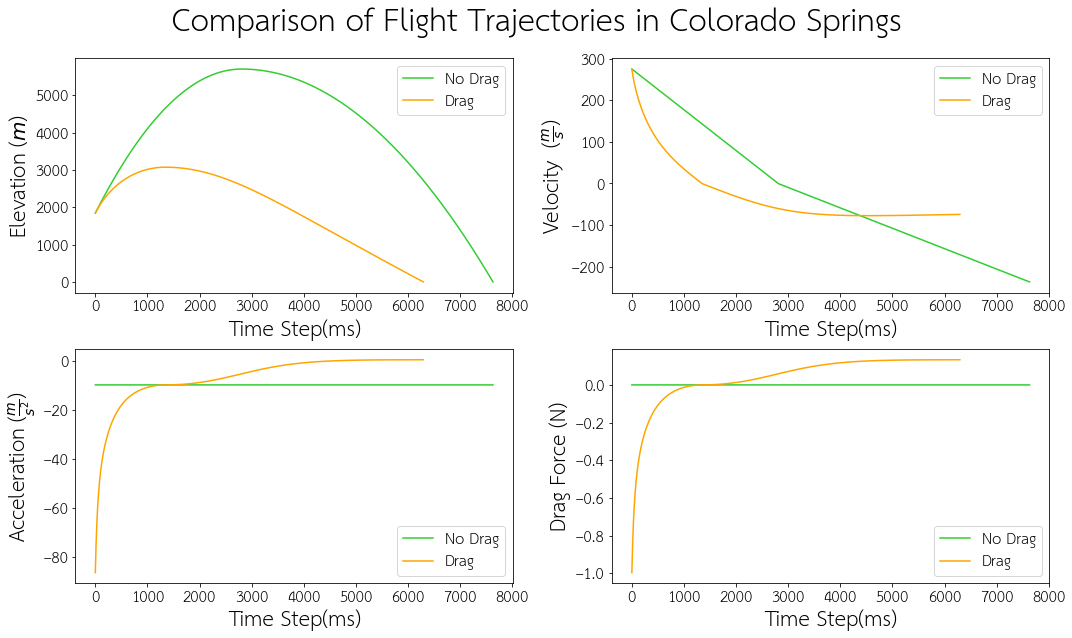

In [138]:
f1 = plt.figure(figsize=(15,9))

plt.subplot(221)
plt.plot(test_classical_co[0], linestyle='-', color='limegreen',markerfacecolor='none', label='No Drag', markevery=10)
plt.plot(test_drag_co[0], linestyle='-', color='orange',markerfacecolor='none', label='Drag', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(ms)',fontsize=20)
plt.ylabel('Elevation ($m$)',fontsize=20)

plt.subplot(222)
plt.plot(test_classical_co[1], linestyle='-',color='limegreen',markerfacecolor='none', label='No Drag', markevery=10)
plt.plot(test_drag_co[1], linestyle='-',  color='orange',markerfacecolor='none', label='Drag', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(ms)',fontsize=20)
plt.ylabel(r'Velocity  ($\frac{m}{s}$)',fontsize=20)

plt.subplot(223)
plt.plot(test_classical_co[2], linestyle='-', color='limegreen',markerfacecolor='none', label=r'No Drag', markevery=10)
plt.plot(test_drag_co[2], linestyle='-',  color='orange',markerfacecolor='none', label='Drag', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(ms)',fontsize=20)
plt.ylabel(r'Acceleration ($\frac{m}{s^2}$)',fontsize=20)

plt.subplot(224)
plt.plot(test_classical_co[3], linestyle='-', color='limegreen',markerfacecolor='none', label='No Drag', markevery=10)
plt.plot(test_drag_co[3], linestyle='-',  color='orange',markerfacecolor='none', label='Drag', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(ms)',fontsize=20)
plt.ylabel('Drag Force (N)',fontsize=20)

plt.suptitle('Comparison of Flight Trajectories in Colorado Springs', fontsize=30)

plt.tight_layout()
plt.subplots_adjust(top=.9)

In [141]:
#Becasue the professor mentioned the dead sea


initial_velocity =  275 
initial_height = -430
dt = 0.01

test_classical_dead_sea = Flight_Tracker(dt,initial_height, initial_velocity, 'off')
print('========')
test_drag_dead_sea = Flight_Tracker(dt,initial_height, initial_velocity, 'on')

Current Pos, Vec, Acc, Drag at top height: 3429.7924399996014 -0.08600000001865304 -9.8
Max Height Reached at :3429.7924399996014 meters
Current Pos, Vec, Acc, Drag at ground level: -0.3859600011133062 -183.346000000025 -9.8
Time of Flight for Trajectory:  65.47
Time of Flight to Top:  28.07
Time of Flight for Ground:  37.410000000000004
Current Pos, Vec, Acc, Drag at top height: 618.8144309716274 -0.002363230347390499 -9.8000111668766
Max Height Reached at :618.8144309716274 meters
Current Pos, Vec, Acc, Drag at ground level: -0.33856838588496907 -61.97824140049273 -3.2043037845275855
Time of Flight for Trajectory:  29.25
Time of Flight to Top:  12.11
Time of Flight for Ground:  17.150000000000002


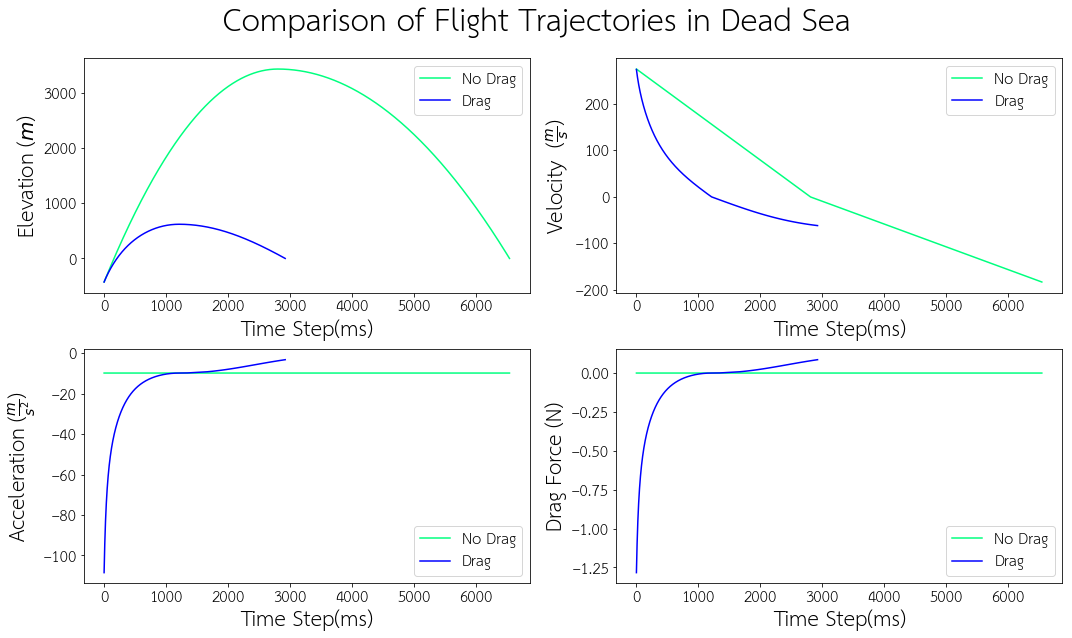

In [145]:
f1 = plt.figure(figsize=(15,9))

plt.subplot(221)
plt.plot(test_classical_dead_sea[0], linestyle='-', color='springgreen',markerfacecolor='none', label='No Drag', markevery=10)
plt.plot(test_drag_dead_sea[0], linestyle='-', color='blue',markerfacecolor='none', label='Drag', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(ms)',fontsize=20)
plt.ylabel('Elevation ($m$)',fontsize=20)

plt.subplot(222)
plt.plot(test_classical_dead_sea[1], linestyle='-',color='springgreen',markerfacecolor='none', label='No Drag', markevery=10)
plt.plot(test_drag_dead_sea[1], linestyle='-',  color='blue',markerfacecolor='none', label='Drag', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(ms)',fontsize=20)
plt.ylabel(r'Velocity  ($\frac{m}{s}$)',fontsize=20)

plt.subplot(223)
plt.plot(test_classical_dead_sea[2], linestyle='-', color='springgreen',markerfacecolor='none', label=r'No Drag', markevery=10)
plt.plot(test_drag_dead_sea[2], linestyle='-',  color='blue',markerfacecolor='none', label='Drag', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(ms)',fontsize=20)
plt.ylabel(r'Acceleration ($\frac{m}{s^2}$)',fontsize=20)

plt.subplot(224)
plt.plot(test_classical_dead_sea[3], linestyle='-', color='springgreen',markerfacecolor='none', label='No Drag', markevery=10)
plt.plot(test_drag_dead_sea[3], linestyle='-',  color='blue',markerfacecolor='none', label='Drag', markevery=10)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.xlabel('Time Step(ms)',fontsize=20)
plt.ylabel('Drag Force (N)',fontsize=20)

plt.suptitle('Comparison of Flight Trajectories in Dead Sea', fontsize=30)

plt.tight_layout()
plt.subplots_adjust(top=.9)

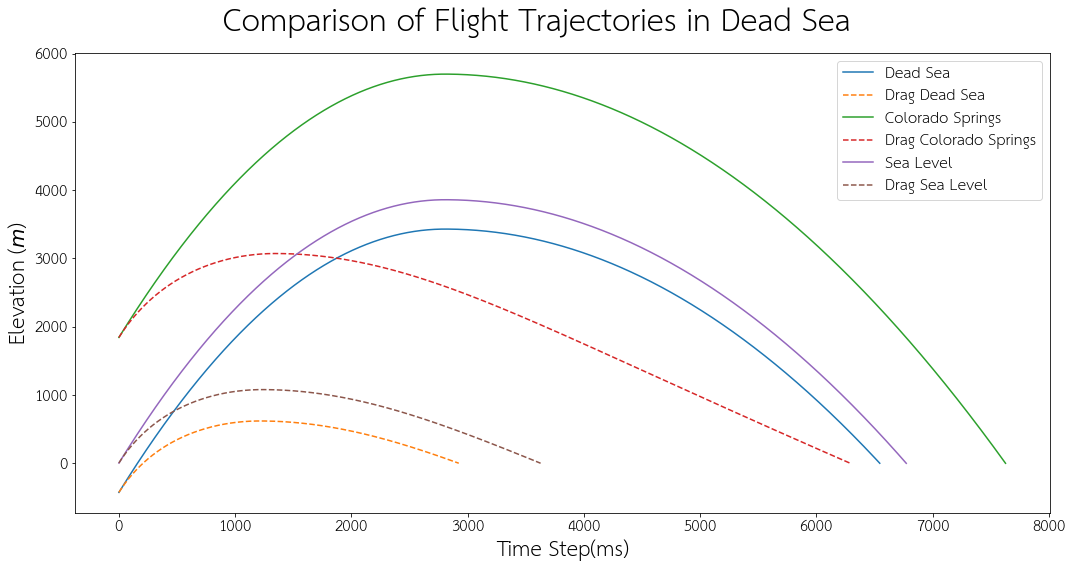

In [165]:
f1 = plt.figure(figsize=(15,8))

plt.plot(test_classical_dead_sea[0], linestyle='-', label='Dead Sea')
plt.plot(test_drag_dead_sea[0], linestyle='--', label='Drag Dead Sea')

plt.plot(test_classical_co[0], linestyle='-', label='Colorado Springs')
plt.plot(test_drag_co[0], linestyle='--', label='Drag Colorado Springs')

plt.plot(test_classical[0], linestyle='-', label='Sea Level')
plt.plot(test_drag[0], linestyle='--', label='Drag Sea Level')

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.suptitle('Comparison of Flight Trajectories in Dead Sea', fontsize=30)

plt.xlabel('Time Step(ms)',fontsize=20)
plt.ylabel('Elevation ($m$)',fontsize=20)


plt.tight_layout()
plt.subplots_adjust(top=.9)